# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


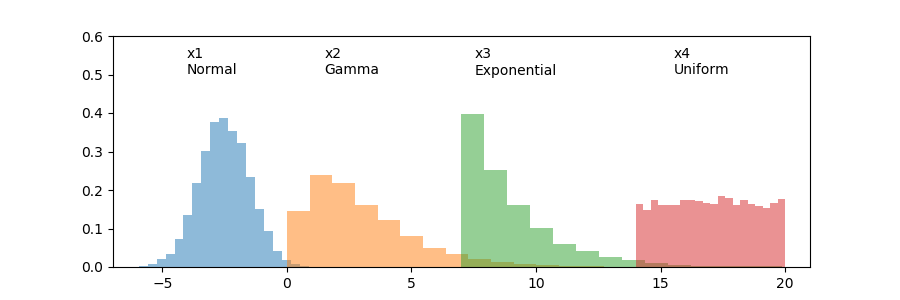

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


Text(15.512060740970586, 0.5, 'x4\nUniform')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


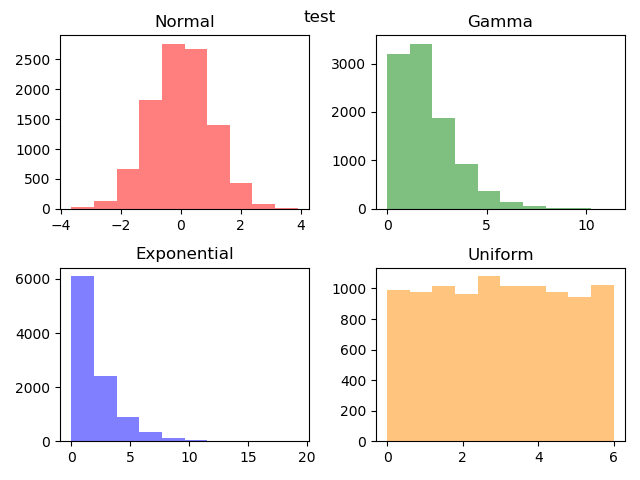

In [3]:
import matplotlib.animation as animation

fig, ([subplot1, subplot2], [subplot3, subplot4]) = plt.subplots(2, 2)

plt.cla()
n = 10000

# subplots re-set to standard positions
x1 = np.random.normal(0, 1, n)
x2 = np.random.gamma(2, 1, n)
x3 = np.random.exponential(2, n)
x4 = np.random.uniform(0, 6, n)

# increment the number of bins in every 10th frame
bins = 10

subplot1.hist(x1, bins=bins, alpha=0.5, color='red')
subplot2.hist(x2, bins=bins, alpha=0.5, color='green')
subplot3.hist(x3, bins=bins, alpha=0.5, color='blue')
subplot4.hist(x4, bins=bins, alpha=0.5, color='darkorange')

subplot1.set_title('Normal')
subplot2.set_title('Gamma')
subplot3.set_title('Exponential')
subplot4.set_title('Uniform')
fig.suptitle('test')
plt.tight_layout()

In [7]:
def update(curr):
    
    if curr == n:
        a.event_source.stop()
        
    subplot1.cla()
    subplot2.cla()
    subplot3.cla()
    subplot4.cla()

    # subplots re-set to standard positions
    x1 = np.random.normal(0, 1, n)
    x2 = np.random.gamma(2, 1, n)
    x3 = np.random.exponential(2, n)
    x4 = np.random.uniform(0, 6, n)

    # increment the number of bins in every 10th frame
    # bins = 20 + curr // 10
    bins = 10 + curr

    # drawing the subplots
    subplot1.hist(x1, bins=bins, alpha=0.5, color='red')
    subplot2.hist(x2, bins=bins, alpha=0.5, color='green')
    subplot3.hist(x3, bins=bins, alpha=0.5, color='blue')
    subplot4.hist(x4, bins=bins, alpha=0.5, color='darkorange')

    # set all ticks to null
    subplot1.set_xticks([])
    subplot2.set_xticks([])
    subplot3.set_xticks([])
    subplot4.set_xticks([])
    subplot1.set_yticks([])
    subplot2.set_yticks([])
    subplot3.set_yticks([])
    subplot4.set_yticks([])

    # name the subplots
    subplot1.set_title('Normal')
    subplot2.set_title('Gamma')
    subplot3.set_title('Exponential')
    subplot4.set_title('Uniform')
    
    # the title will change to reflect the number of bins
    fig.suptitle('No of bins: {}'.format(bins))
    
    # no redundant space left for saving into mp4
    plt.tight_layout()

In [8]:
# will use the ffmpeg writer - it has to be installed externally
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Kuba Siekierzynski', title='Distributions'), bitrate=1800)

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [9]:
fig, ([subplot1, subplot2], [subplot3, subplot4]) = plt.subplots(2, 2)
a = animation.FuncAnimation(fig, update, interval=100, save_count=500, blit=True, frames=100)

# will only work with ffmpeg installed!!!
a.save('distributions.mp4', writer=writer)

<IPython.core.display.Javascript object>

NameError: name 'writer' is not defined